In [1]:

import pandas as pd


# In[6]:


A=pd.read_csv("C:/Users/Ashish/Desktop/DataScience/Datasets/Credit.csv")
A = A.drop(A.columns[[0]], axis=1)  
A[1:5]


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


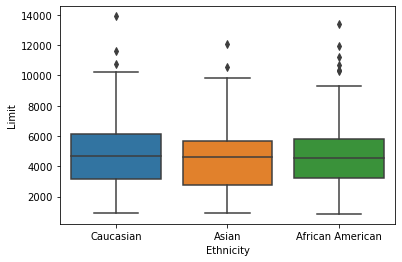

In [2]:


import seaborn as sb
sb.boxplot(A.Ethnicity,A.Limit)


In [3]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
B = A.apply(le.fit_transform)
B[1:5]

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,1,366,317,219,2,59,10,1,1,1,1,196
2,2,365,328,231,3,48,6,0,0,0,1,126
3,3,388,369,265,2,13,6,1,0,0,1,210
4,4,294,215,143,1,45,11,0,0,1,2,66


In [4]:

X = B[["Income","Age"]]
Y = B[['Ethnicity']]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size = 0.20,random_state=40)


In [5]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=20)
model = abc.fit(xtrain,ytrain)


C:\Users\Ashish\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [6]:

pred = model.predict(xtest)
ytest['pred'] = pred
ytest

C:\Users\Ashish\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ethnicity,pred
132,0,1
390,1,0
310,0,2
3,1,1
248,2,1
...,...,...
361,1,2
197,0,2
23,0,2
54,1,1


In [11]:

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(ytest.Ethnicity,ytest.pred)
accuracy_score(ytest.Ethnicity,ytest.pred)


0.4125

In [8]:
model.feature_importances_


array([0.50887545, 0.49112455])

<BarContainer object of 2 artists>

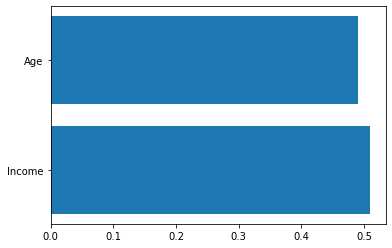

In [9]:

import matplotlib.pyplot as plt
plt.barh(X.columns,model.feature_importances_)
